In [17]:
import numpy as np
import cv2 as cv
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Assignment 1: Histograms and Binary Images

In this assignment, we are tasked with getting acquainted with images of varying resolutions and colors using Python. To do this, we graphed histograms of each image that described all of its pixel values, and then chose a threshold by which we converted the pixels to a binary. Then, we plotted new images using their new binary values and analyzed the result. We worked with the following types of images to achieve this task:
- High resolution image (2048 x 1536)
- Low resolution image (640 x 480)
- Pink filtered image
- Yellow filtered image

For ease of analysis, we first converted each image into grayscale upon loading them.

In [18]:
# Read all 4 images
img1 = cv.imread("high_res_2048_1536.jpg", cv.IMREAD_GRAYSCALE).ravel()
img2 = cv.imread("low_res_2.jpg", cv.IMREAD_GRAYSCALE).ravel()
img3 = cv.imread("pink_filter.jpg", cv.IMREAD_GRAYSCALE).ravel()
img4 = cv.imread("yellow_filter.jpg", cv.IMREAD_GRAYSCALE).ravel()

Then we plotted a histogram for each image that counted the number of pixels that had a value between 1-256. 

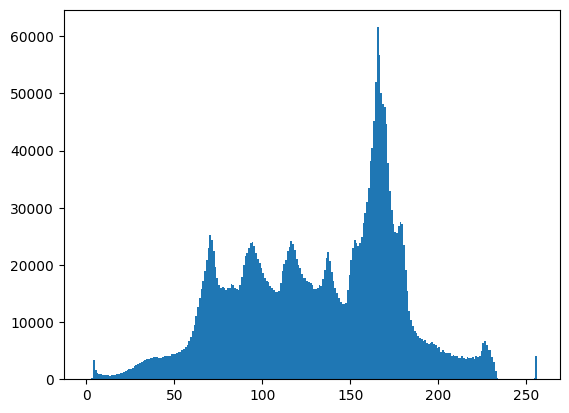

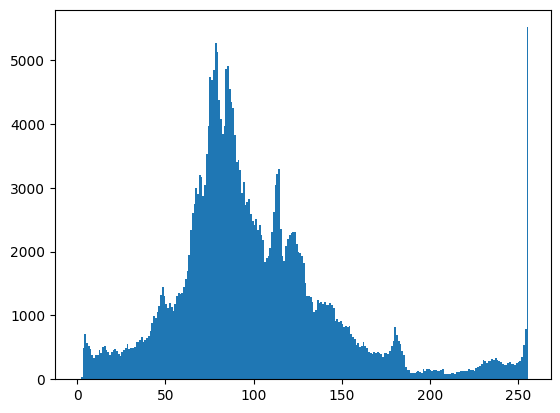

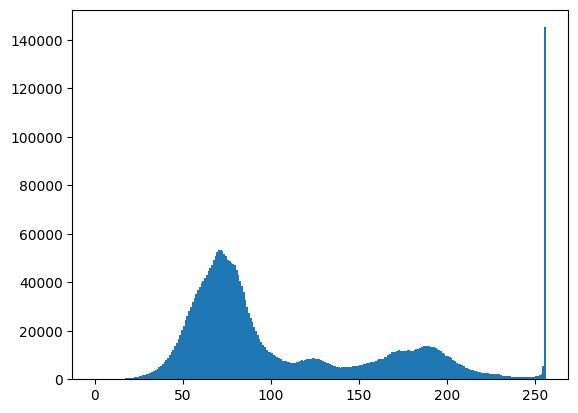

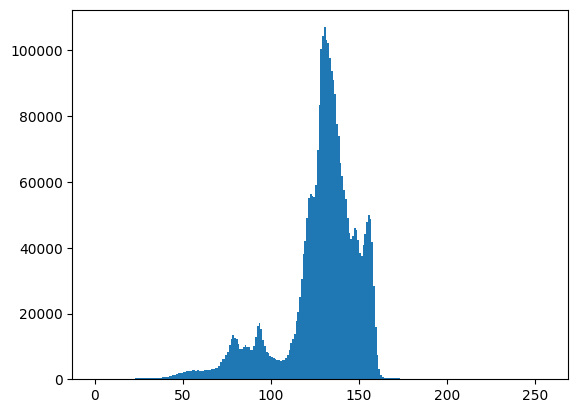

In [19]:
def plot_histogram(data, colorscale):
    '''
    Plots a histogram of an image given an array of integers representing the pixel
    color, and the max value of the colorgrade scale.

    Args:
        data: An array of integers representing each pixel's color value in the photo.
        colorscale: An integer representing the max value of the color scale.
    '''
    plt.hist(data, colorscale, [0, colorscale])
    plt.show()

# Plot histograms of each image's pixel values from 0-256.
plot_histogram(img1, 256)
plot_histogram(img2, 256)
plot_histogram(img3, 256)
plot_histogram(img4, 256)

Based off what we see in each image's histogram, we decided to choose a threshold based off the median of the data. By choosing the median value, we would ensure that half the data fell under the threshold and designate that to 0. The remaining half would fall above the threshold, which we designate to 1. This was the easiest way we found to ensure the image had an even distribution of white and black pixels. We defined a function that would convert each image's pixels into a binary value of either 0 or 256 (white or black) based off the pixel's original color value relation to the threshold. Finally, we print the binary versions of each image. 

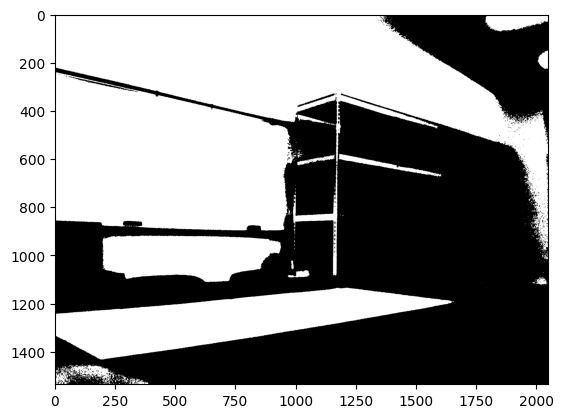

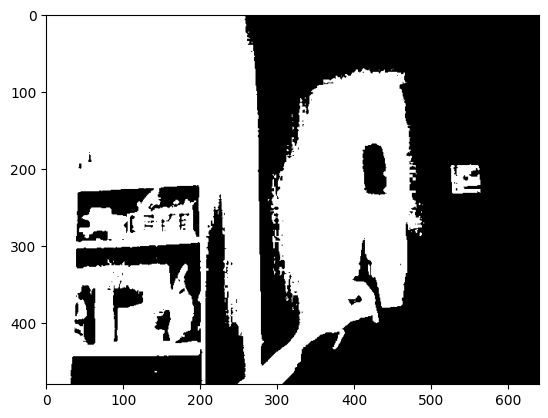

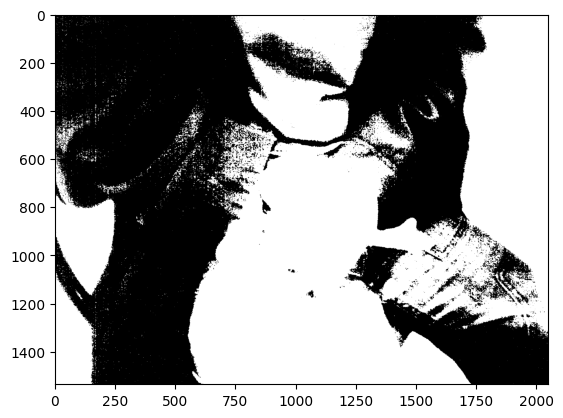

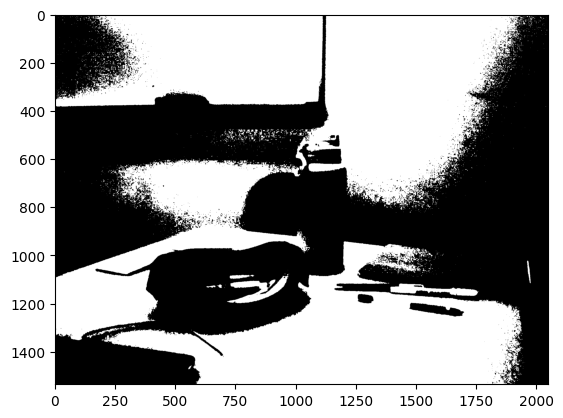

In [20]:
def convert_binary(input_data, threshold):
    '''
    Converts each pixel value to 0 (white) if below a given threshold and 1 (black)
    if above a given threshold.
    Args:
        input_data: An array of integers representing each pixel's color value.
        threshold: An integer representing the color value to compare each pixel with.
    '''
    i = 0
    data = []
    while i < len(input_data):
        if input_data[i] < threshold:
            data.append(0)
        else:
            data.append(255)
        i += 1
    return np.array(data)

# Convert each image's pixels into binary and print a display of each image.
new_img1 = convert_binary(img1, np.median(img1))
plt.imshow(new_img1.reshape(1536, 2048), cmap="gray")
plt.show()

new_img2 = convert_binary(img2, np.median(img2))
plt.imshow(new_img2.reshape(480, 640), cmap="gray")
plt.show()

new_img3 = convert_binary(img3, np.median(img3))
plt.imshow(new_img3.reshape(1536, 2048), cmap="gray")
plt.show()

new_img4 = convert_binary(img4, np.median(img4))
plt.imshow(new_img4.reshape(1536, 2048), cmap="gray")
plt.show()

After analyzing each of the resulting binary images, we came to the conclusion that thought converting an image into a binary may be useful/beneficial in certain cases. For example, the first image is relatively clear because it was simple and only contained a bookshelf in a well-lit room. In our case, the remaining images were too cluttered and didn't have strong contrast, and so image segmentation/feature detection would not be possible, or at least be quite difficult/inaccurate. In order to more accurately segment the images, we would need to take pictures with more contrast or use an alternative image processing method, since the binary was not too clear. 